In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2fed0b437b047468dcae844319ee547c


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gamba
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | halalo
City not found. Skipping...
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | camacupa
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | tual
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | belushya gub

Processing Record 38 of Set 4 | birao
Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | montilla
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | san ramon
Processing Record 43 of Set 4 | raga
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | bargal
City not found. Skipping...
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | geilo
Processing Record 48 of Set 4 | san cristobal
Processing Record 49 of Set 4 | bereda
Processing Record 50 of Set 4 | maningrida
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | lenoir
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | jiddah
City not found. Skipping...
Processing Record 6 of Set 5 | sioux lookout
Processing Record 7 of Set 5 | comodoro rivadavia
Processing Record 8 of Set 5 | ducheng
Processing Record 9 of Set 5 | duldurga
P

City not found. Skipping...
Processing Record 24 of Set 8 | garowe
Processing Record 25 of Set 8 | sahrak
City not found. Skipping...
Processing Record 26 of Set 8 | disna
Processing Record 27 of Set 8 | mosetse
Processing Record 28 of Set 8 | batemans bay
Processing Record 29 of Set 8 | baykit
Processing Record 30 of Set 8 | catamarca
Processing Record 31 of Set 8 | moiyabana
City not found. Skipping...
Processing Record 32 of Set 8 | winder
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | puerto leguizamo
Processing Record 35 of Set 8 | bure
Processing Record 36 of Set 8 | adelaide
Processing Record 37 of Set 8 | solnechnyy
Processing Record 38 of Set 8 | tolaga bay
Processing Record 39 of Set 8 | lasa
Processing Record 40 of Set 8 | deer lake
Processing Record 41 of Set 8 | chitral
Processing Record 42 of Set 8 | kokopo
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | yasnyy
Processing Record 45 of Set 8 | paamiut
Processing Record 46 

Processing Record 12 of Set 12 | shubarshi
Processing Record 13 of Set 12 | namikupa
Processing Record 14 of Set 12 | saint-leu
Processing Record 15 of Set 12 | fairbanks
Processing Record 16 of Set 12 | mochalishche
Processing Record 17 of Set 12 | linchuan
City not found. Skipping...
Processing Record 18 of Set 12 | sakakah
Processing Record 19 of Set 12 | asosa
Processing Record 20 of Set 12 | whitefish
Processing Record 21 of Set 12 | urozhayne
City not found. Skipping...
Processing Record 22 of Set 12 | labuhan
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | marawi
Processing Record 25 of Set 12 | ossora
Processing Record 26 of Set 12 | po
City not found. Skipping...
Processing Record 27 of Set 12 | iracoubo
Processing Record 28 of Set 12 | pedernales
Processing Record 29 of Set 12 | norrtalje
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | olinda
Processing Record 32 of Set 12 | tura
Processing Record 33 of Set 12 | warah
Proce

In [10]:
len(city_data)

572

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gamba,-2.6500,10.0000,76.57,89,100,3.98,GA,2022-11-02 05:52:30
1,Atuona,-9.8000,-139.0333,77.07,75,4,11.83,PF,2022-11-02 05:52:31
2,Georgetown,5.4112,100.3354,84.13,88,20,5.99,MY,2022-11-02 05:51:16
3,Iqaluit,63.7506,-68.5145,29.93,92,100,21.85,CA,2022-11-02 05:52:32
4,Rikitea,-23.1203,-134.9692,70.03,63,47,17.90,PF,2022-11-02 05:47:58
5,Vaini,-21.2000,-175.2000,75.36,100,100,8.05,TO,2022-11-02 05:52:34
6,Camacupa,-12.0167,17.4833,66.96,78,98,1.79,AO,2022-11-02 05:52:34
7,Te Anau,-45.4167,167.7167,63.00,58,31,1.54,NZ,2022-11-02 05:52:35
8,Castro,-24.7911,-50.0119,43.68,97,100,7.74,BR,2022-11-02 05:52:36
9,Korla,41.7597,86.1469,53.22,30,4,6.89,CN,2022-11-02 05:52:36


In [12]:
#Reordering the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [33]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gamba,GA,2022-11-02 05:52:30,-2.6500,10.0000,76.57,89,100,3.98
1,Atuona,PF,2022-11-02 05:52:31,-9.8000,-139.0333,77.07,75,4,11.83
2,Georgetown,MY,2022-11-02 05:51:16,5.4112,100.3354,84.13,88,20,5.99
3,Iqaluit,CA,2022-11-02 05:52:32,63.7506,-68.5145,29.93,92,100,21.85
4,Rikitea,PF,2022-11-02 05:47:58,-23.1203,-134.9692,70.03,63,47,17.90


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1667369425.188159

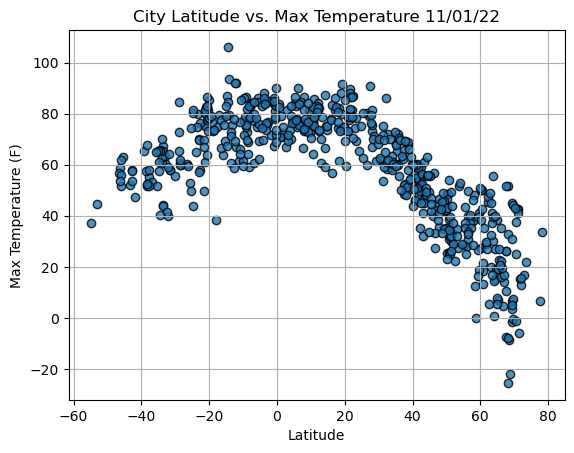

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

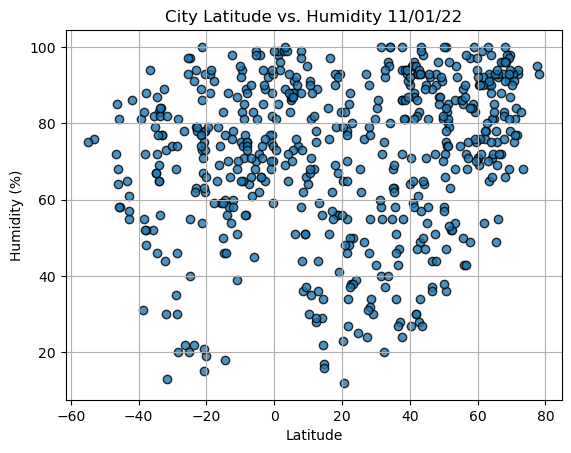

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

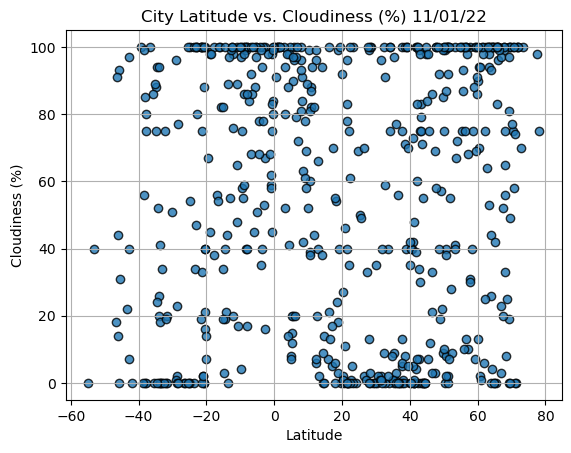

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

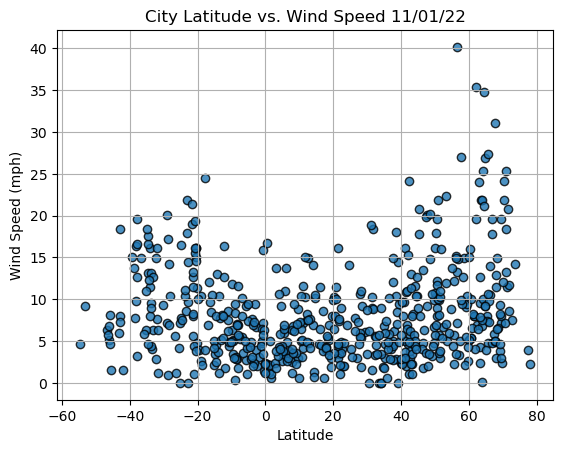

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City             Praia Da Vitoria
Country                        PT
Date          2022-11-02 05:52:39
Lat                       38.7333
Lng                      -27.0667
Max Temp                    67.75
Humidity                       94
Cloudiness                     40
Wind Speed                   8.48
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

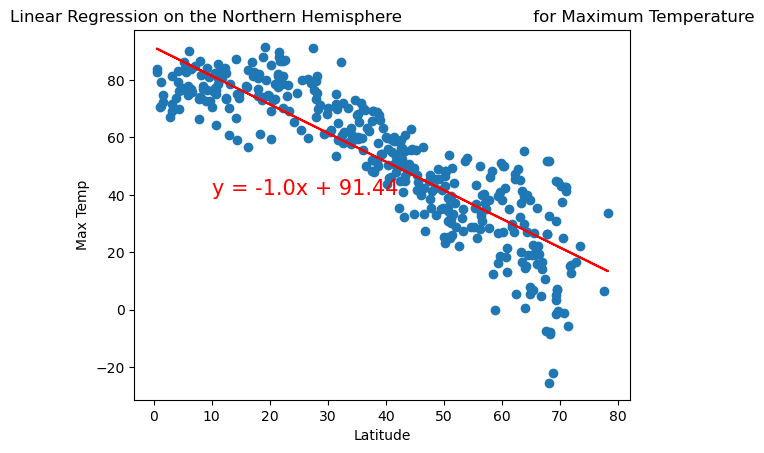

In [24]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

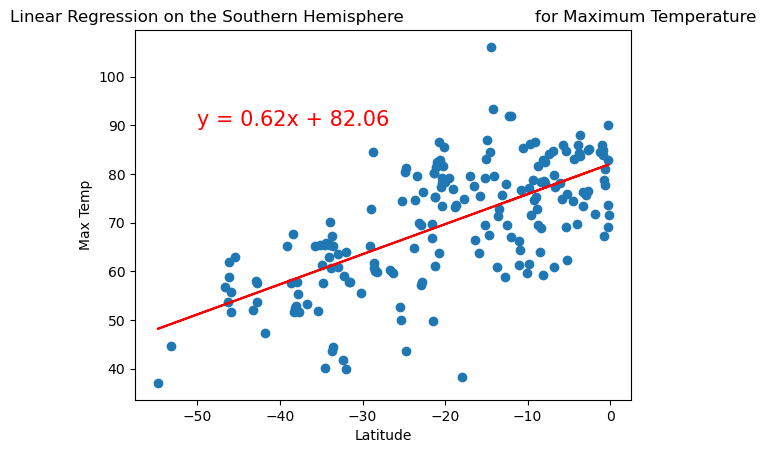

In [25]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

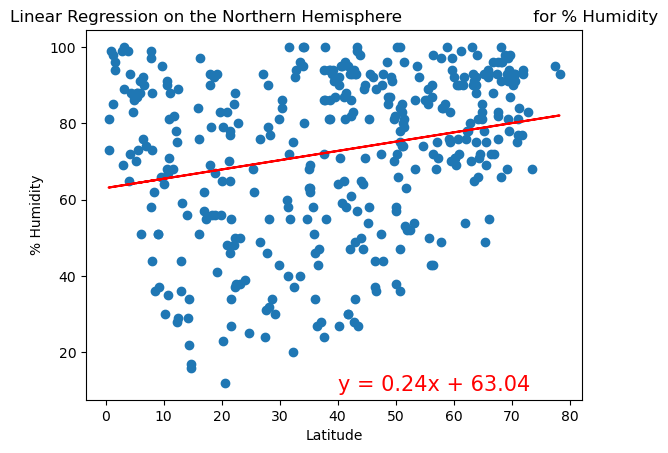

In [26]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

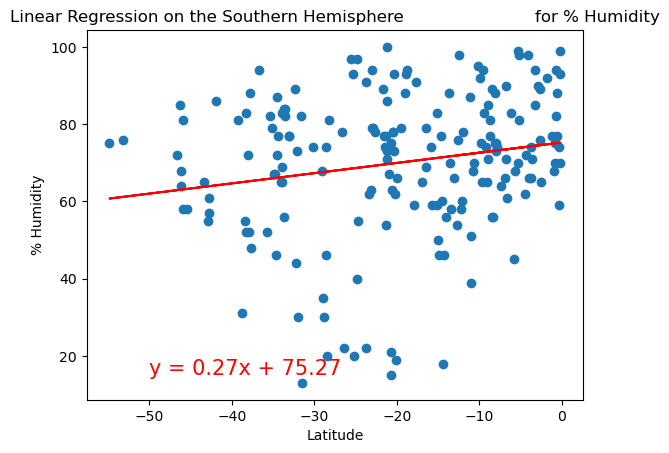

In [27]:
# Linear regression on the Southern Hemisphere - Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

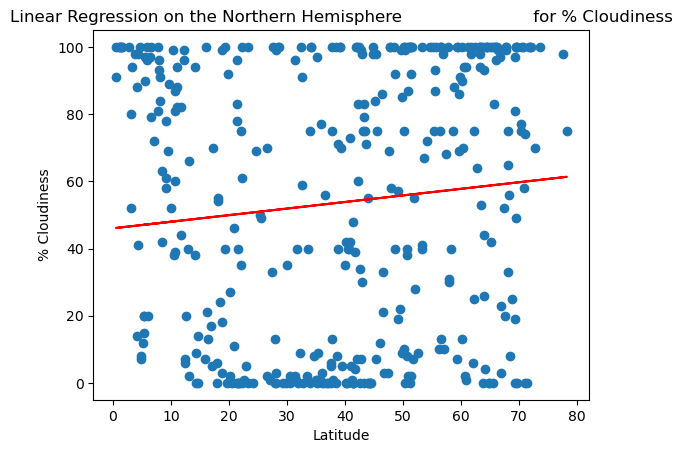

In [28]:
#Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

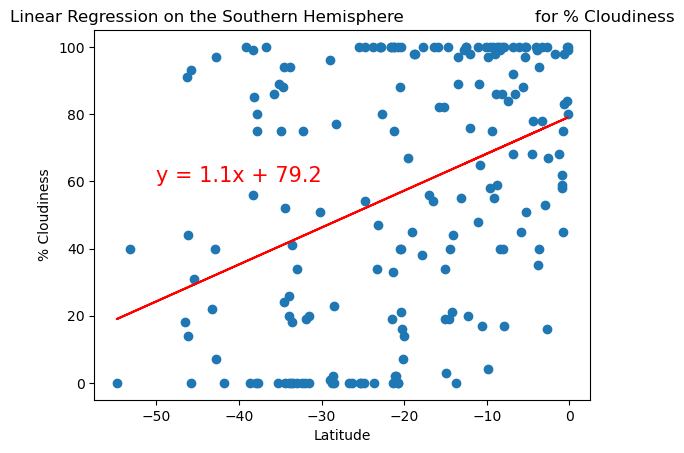

In [29]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

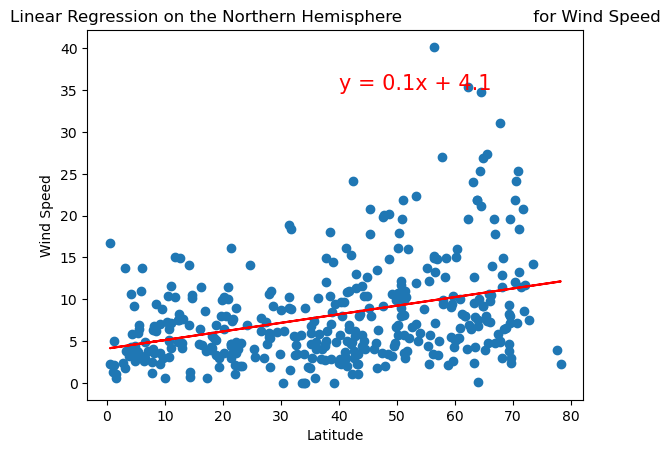

In [30]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

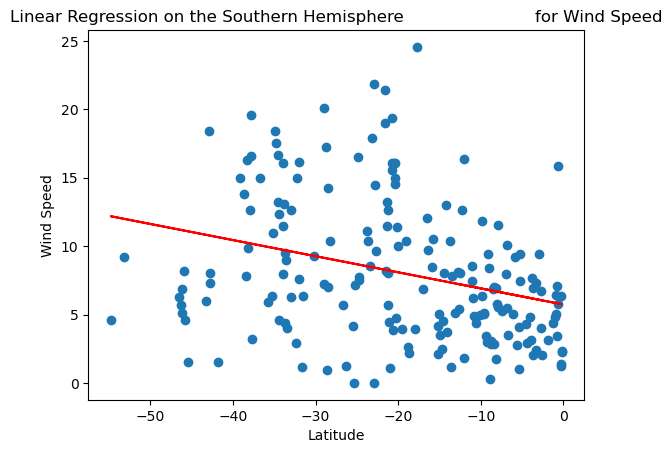

In [31]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))